## Introduction ##
#### Welcome to this hands-on learning notebook.
###### Here, we use our basic Machine learning models to classify a wine sample into three different categories(regions) based on its content.
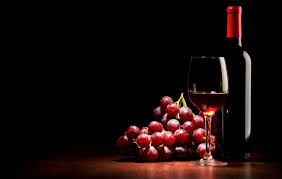<br>
* These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
* Our task is, given the contents of the wine, we have to classify it into the three regions as stated above<br><br>
### Lets get started!!!

# **Importing the base libraries : numpy,pandas,matplot**
* numpy is used to perfoem almost any mathematical operations in python
* pandas makes, reading, manipulating, summarizing, deleting the data
* matplatlib is used to visualize the data

In [3]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualization

## Loading Data ##
 A DataFrame is a table. It contains an array of individual entries, each of which has a certain value. Each entry corresponds to a row (or record) and a column.

For example, consider the following simple DataFrame:

In [4]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})

,Yes,No
0,50,131
1,21,2


* Pandas has "read_csv" function to read the CSV file into a dataframe. We can have our own column names as shown below.
* The head function gives first 'n' rows from the dataframe.

In [5]:
column_names = [ 'name'
             ,'alcohol'
             ,'malicAcid'
             ,'ash'
            ,'ashalcalinity'
             ,'magnesium'
            ,'totalPhenols'
             ,'flavanoids'
             ,'nonFlavanoidPhenols'
             ,'proanthocyanins'
            ,'colorIntensity'
             ,'hue'
             ,'od280_od315'
             ,'proline']

df=pd.read_csv('Wine.csv',names=column_names)
df.head(5)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Check for Missing Values ##
Entries missing values are given the value NaN, short for "Not a Number". For technical reasons these NaN values are always of the float64 dtype.

* We have to check for missing values. If there are more missing values, then we have to remove that column, else, we can remove the corresponding rows.
* We have a standard function "isnull()" to check whether a column has missing values.
* It returns a binary list, each entry corresponding to a column.
 ex: [ 0, 1, 0, 1, 1, 1, 0, 0, 0 ]
* We sum it to see how many columns have null values.

In [6]:
df.isnull().sum()

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

Luckily, We have no missing values in any column.
* But if there are, Pandas provides a really handy method for this problem: fillna(). fillna() provides a few different strategies for mitigating such data. For example, we can simply replace each NaN with a 0<br>
ex: df.alchohol.fillna(0.)

In [7]:
df.alcohol.fillna(0.)

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

## Features ##
* Since the first column is the target variable for prediction, we drop it.
* We store the remaining features into a dataframe 'X'
* The "drop()" method is used for this which requires column and axis.

In [8]:
X= df.drop(['name'], axis=1)
X.head()

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Index-based selection
Pandas indexing works in one of two paradigms. The first is index-based selection: selecting data based on its numerical position in the data which is iloc.

In [9]:
df.iloc[0] # df.iloc["row_num","col_num"]

name                      1.00
alcohol                  14.23
malicAcid                 1.71
ash                       2.43
ashalcalinity            15.60
magnesium               127.00
totalPhenols              2.80
flavanoids                3.06
nonFlavanoidPhenols       0.28
proanthocyanins           2.29
colorIntensity            5.64
hue                       1.04
od280_od315               3.92
proline                1065.00
Name: 0, dtype: float64

## Labels ##
* We need to extract the target variable with "iloc".
* Finally, it's worth knowing that negative numbers can be used in selection. This will start counting forwards from the end of the values. So for example here are the last five elements of the dataset.
* ':' stands for all,so we are selecting all rows or columns. 


In [10]:
Y=df.iloc[:,0] #Selecting all rows from 1st column
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: name, dtype: int64

## Train-Test Split ##
* The power of sklearn is unleashed here.
* Here, it contains a handy function called "train_test_split" which helps us to divide the dataset into train and test.
* We have to input the fraction we want to divide them.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


# Utilities
* There are some functions which are of standard use while we do classification<br>
k-Fold Cross-Validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.<br><br>

## 1) K-fold Cross Validation
* Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general.<br>
* The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.
<br>
* It is a popular method and standard method used in selection of algorithms.
<br><br>

### Working <br>

Imagine we have a data sample with 6 observations:
<br>
 [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
<br>
* The first step is to pick a value for k in order to determine the number of folds used to split the data. Here, we will use a value of k=3. 
* That means we will shuffle the data and then split the data into 3 groups. Because we have 6 observations, each group will have an equal number of 2 observations.<br><br>
Fold1: [0.5, 0.2]<br>
Fold2: [0.1, 0.3]<br>
Fold3: [0.4, 0.6]
<br><br>
* Three models are trained and evaluated with each fold given a chance to be the held out test set.<br>
<br>
Model1: Trained on Fold1 + Fold2, Tested on Fold3<br>
Model2: Trained on Fold2 + Fold3, Tested on Fold1<br>
Model3: Trained on Fold1 + Fold3, Tested on Fold2
<br><br>
* The models are then discarded after they are evaluated as they have served their purpose.
* The skill scores are collected for each model,summarized for use and the best average scored model is selected.

### API <br>
* We do not have to implement k-fold cross-validation manually. The scikit-learn library provides an implementation that will split a given data sample up.

* The KFold() and cross_val_score() scikit-learn classes can be used. It takes as arguments the number of splits, whether or not to shuffle the sample, and the seed for the pseudorandom number generator used prior to the shuffle.<br>
**ex: kfold = KFold(3, True, 1)**

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [13]:
#sample code cell, do not run
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,X_train,Y_train.values.ravel(),cv = kfold,scoring = "accuracy")
# returns the above defined score for given "model" and "kfold" partitioning

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


## Classifier Models ##
* Here comes our Machine Learning models we have learnt. By applying a model, we are generally making rules from the train data.
* We use these rules for future prediction. This is ML in a nutshell.

# MODELS
* We use classification models to classify the type of wine.
* But which model is the best. So, here comes the iterative process involved in Machine Learning.
* In an itertative process, we try different models with different settings, and picks up the one which performs the best based on the above defined k-fold metrics.

In [31]:
#We take a list of models and its accuracies
model_names = []
model_accuracy = []

### MODEL-1 (LOGISTIC REGRESSION) ###
* This is the simplest classification algorithm we can use in ML.
* It draws linear-like boundaries between classes two differenciate them.
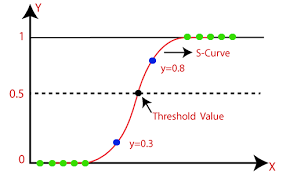
* It uses a function called sigmoid which squashes the values between 0 and 1 (like probability).
* This can be extended to multiclass by taking one to many technique.
* Abstracting us from the complexity, scikit learn gives us LogisticRegression() to achieve our objective.

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
kfold = KFold(n_splits=10, random_state=0,shuffle=True)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
model_names.append("Logistic_Regression")
model_accuracy.append(cv_result.mean())
print("Logistic Regression :",cv_result.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression : 0.9608974358974359


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 ### Model-2 (K-Nearest-Neighbours) ###
* * This is a very intuitive and easy method for classification.
* A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function.
* Eucledean distance is mostly used as a distance function.<br><br>
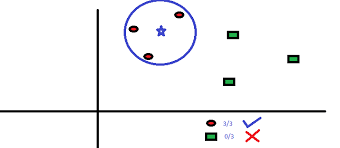<br>
* Scikit Learn provides an abstract function "KNeighborsClassifier"

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
kfold = KFold(n_splits=10, random_state=0,shuffle=True)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
model_names.append("K-Nearest-Neighbors")
model_accuracy.append(cv_result.mean())
print("K-Nearest-Neighbors :",cv_result.mean())


K-Nearest-Neighbors : 0.7108974358974358


 ### Model-3 (Decision Trees) ###
 * Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 
 * The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
 * Here is an example :
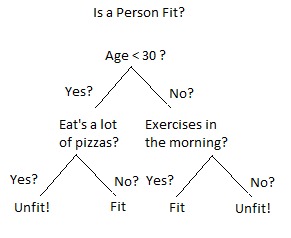
* This is most exactly what decision tree does.


In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
kfold = KFold(n_splits=10, random_state=0,shuffle=True)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
model_names.append("Decision Trees")
model_accuracy.append(cv_result.mean())
print("Decision Trees :",cv_result.mean())

Decision Trees : 0.9198717948717947


 ### Model-4 (Random Forest Classifier) ###
 * This is one of the best classifiers presently in use which has a concept of ensembling.
 * Ensembling is a process of combining multiple models, train them parallely, and select the most suitable outcome.
* The core working of this model is same as decision trees, except that many trees are constructed and the most voted output is considered.<br>
 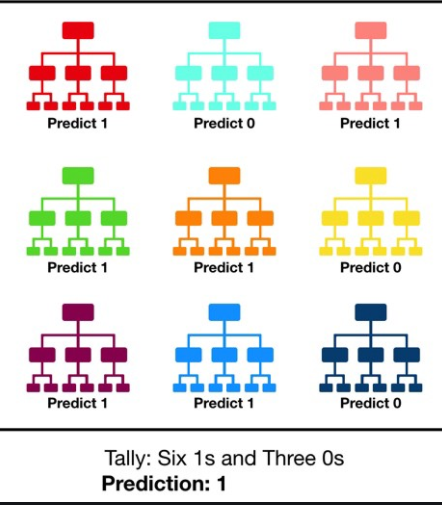


In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10)
kfold = KFold(n_splits=10, random_state=0,shuffle=True)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
model_names.append("Random Forest")
model_accuracy.append(cv_result.mean())
print("Random Forest :",cv_result.mean())

Random Forest : 0.9673076923076922


 ### Model-4 (Support Vector Machines) ###
 * Support vector Machines are robust classifiers.
 * SVC's divide the entire space by hyperplanes(high dimensional lines) to divide each class.
 * Additional to that, it maintains the best seperation between the classes by maintaining large possible distance from the near points(support vectors).<br>
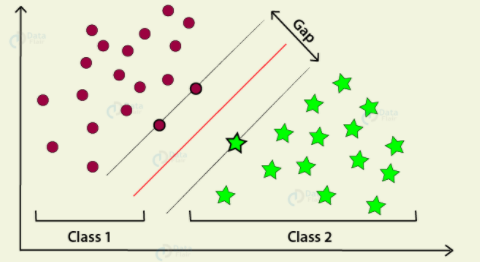


In [36]:
from sklearn.svm import SVC
model = SVC( kernel = "linear") #linear hyperplane, we can also choose non-linear
kfold = KFold(n_splits=10, random_state=0,shuffle=True)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
model_names.append("Support Vector Classifier")
model_accuracy.append(cv_result.mean())
print("Support Vector Classifier :",cv_result.mean())

Support Vector Classifier : 0.9596153846153845


## Results ##
* This is the summary of all the models we have used along with its k-fold accuracy

In [38]:
num_of_models = len(model_names)
for i in range(num_of_models):
    print(model_names[i],':',model_accuracy[i])

Logistic_Regression : 0.9608974358974359
K-Nearest-Neighbors : 0.7108974358974358
Decision Trees : 0.9198717948717947
Random Forest : 0.9673076923076922
Support Vector Classifier : 0.9596153846153845


# Thank You
* There is a lot of feature engineering which is not required here because of the clean data.
* This is a very basic try of all models without much optimization and hyperparameter tuning. 
* Results of accuracy over 95% for some top models but not always the caseIt is worth trying few models like these to get better models. 